Data can be found here: https://www.kaggle.com/competitions/avazu-ctr-prediction/data

In [2]:
import numpy as np
import random
import pandas as pd
import gzip
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
n = 40428967  # Total number of records in the clickstream data 
sample_size = 1000000
skip_values = sorted(random.sample(range(1, n), n - sample_size)) 

In [4]:
types_train = {
    'id': np.dtype(int),
    'click': np.dtype(int),
    'hour': np.dtype(int),
    'C1': np.dtype(int),
    'banner_pos': np.dtype(int),
    'site_id': np.dtype(str),
    'site_domain': np.dtype(str), 
    'site_category': np.dtype(str),
    'app_id': np.dtype(str),
    'app_domain': np.dtype(str),
    'app_category': np.dtype(str),
    'device_id': np.dtype(str),
    'device_ip': np.dtype(str),
    'device_model': np.dtype(str),
    'device_type': np.dtype(int),
    'device_conn_type': np.dtype(int),
    'C14': np.dtype(int),
    'C15': np.dtype(int),
    'C16': np.dtype(int),
    'C17': np.dtype(int),
    'C18': np.dtype(int),
    'C19': np.dtype(int),
    'C20': np.dtype(int),
    'C21': np.dtype(int)
}
types_test = {
    'id': np.dtype(int),
    'hour': np.dtype(int),
    'C1': np.dtype(int),
    'banner_pos': np.dtype(int),
    'site_id': np.dtype(str),
    'site_domain': np.dtype(str), 
    'site_category': np.dtype(str),
    'app_id': np.dtype(str),
    'app_domain': np.dtype(str),
    'app_category': np.dtype(str),
    'device_id': np.dtype(str),
    'device_ip': np.dtype(str),
    'device_model': np.dtype(str),
    'device_type': np.dtype(int),
    'device_conn_type': np.dtype(int),
    'C14': np.dtype(int),
    'C15': np.dtype(int),
    'C16': np.dtype(int),
    'C17': np.dtype(int),
    'C18': np.dtype(int),
    'C19': np.dtype(int),
    'C20': np.dtype(int),
    'C21': np.dtype(int)
}

In [5]:
parse_date = lambda val : pd.datetime.strptime(val, '%y%m%d%H')
with gzip.open('train.gz') as f:
    train = pd.read_csv(f, parse_dates = ['hour'], date_parser = parse_date, dtype=types_train, skiprows = skip_values)
train.head()

C:\Users\Lidor\AppData\Local\Temp\ipykernel_8812\373925013.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  parse_date = lambda val : pd.datetime.strptime(val, '%y%m%d%H')


,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,-1636923355,0,2014-10-21,1005,0,85f751fd,c4e18dd6,50e219e0,e2a1ca37,2347f47a,...,1,0,15708,320,50,1722,0,35,-1,79
1,1315039248,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15705,320,50,1722,0,35,-1,79
2,-193497663,0,2014-10-21,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,0,17747,320,50,1974,2,39,100021,33
3,207493622,0,2014-10-21,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,0,17037,320,50,1934,2,39,-1,16
4,896138657,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15707,320,50,1722,0,35,-1,79


In [6]:
train.shape

(1000000, 24)

In [7]:
train.dtypes

id                           int32
click                        int32
hour                datetime64[ns]
C1                           int32
banner_pos                   int32
site_id                     object
site_domain                 object
site_category               object
app_id                      object
app_domain                  object
app_category                object
device_id                   object
device_ip                   object
device_model                object
device_type                  int32
device_conn_type             int32
C14                          int32
C15                          int32
C16                          int32
C17                          int32
C18                          int32
C19                          int32
C20                          int32
C21                          int32
dtype: object

In [8]:
train['click'].value_counts()

0    830626
1    169374
Name: click, dtype: int64

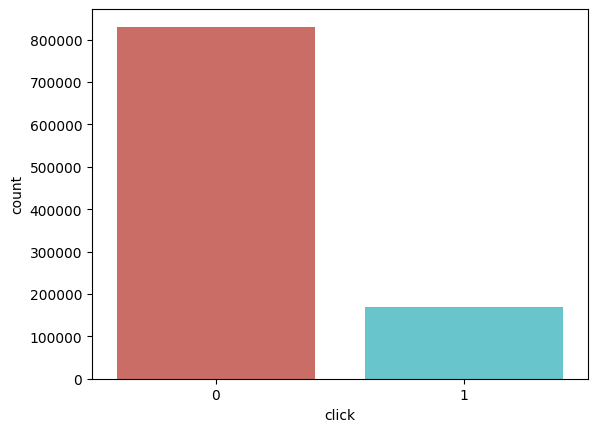

In [9]:
sns.countplot(x = 'click', data = train, palette = 'hls')
plt.show()

In [10]:
train['click'].value_counts() / len(train)

0    0.830626
1    0.169374
Name: click, dtype: float64

In [11]:
train.hour.describe()

C:\Users\Lidor\AppData\Local\Temp\ipykernel_8812\1468264.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  train.hour.describe()


count                 1000000
unique                    240
top       2014-10-22 09:00:00
freq                    11273
first     2014-10-21 00:00:00
last      2014-10-30 23:00:00
Name: hour, dtype: object

Text(0.5, 1.0, 'Number of clicks by hour')

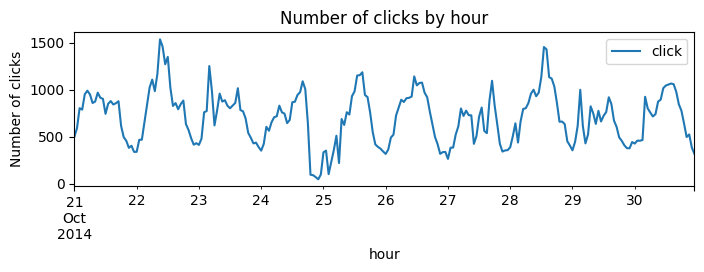

In [12]:
train.groupby('hour').agg({'click': 'sum'}).plot(figsize = (8, 2))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by hour')

Text(0.5, 1.0, 'click trends by hour of day')

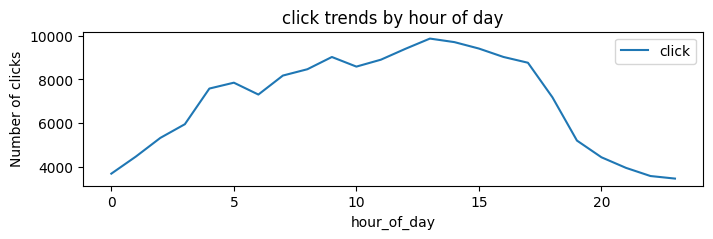

In [13]:
train['hour_of_day'] = train.hour.apply(lambda x: x.hour)
train.groupby('hour_of_day').agg({'click': 'sum'}).plot(figsize = (8, 2))
plt.ylabel('Number of clicks')
plt.title('click trends by hour of day')

Text(0.5, 1.0, 'Hourly impressions vs. clicks')

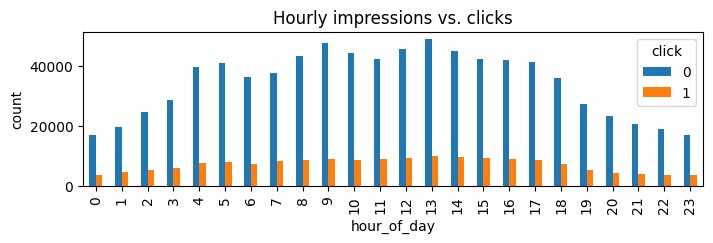

In [14]:
train.groupby(['hour_of_day', 'click']).size().unstack().plot(kind = 'bar', title = "Hour of Day", figsize = (8, 2))
plt.ylabel('count')
plt.title('Hourly impressions vs. clicks')

In [15]:
df_click = train[train['click'] == 1]
df_hour = train[['hour_of_day', 'click']].groupby(['hour_of_day']).count().reset_index()
df_hour = df_hour.rename(columns={'click': 'impressions'})
df_hour['clicks'] = df_click[['hour_of_day', 'click']].groupby(['hour_of_day']).count().reset_index()['click']
df_hour['CTR'] = df_hour['clicks'] / df_hour['impressions'] * 100

Text(0.5, 1.0, 'Hourly CTR')

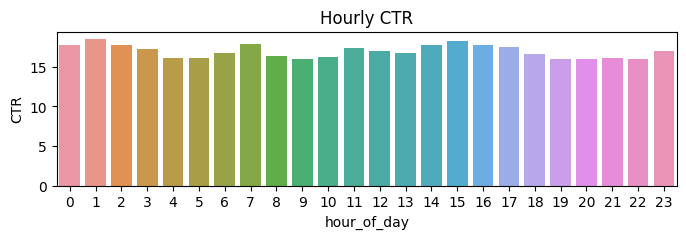

In [16]:
plt.figure(figsize=(8, 2))
sns.barplot(y = 'CTR', x = 'hour_of_day', data = df_hour)
plt.title('Hourly CTR')

Text(0.5, 1.0, 'click trends by day of week')

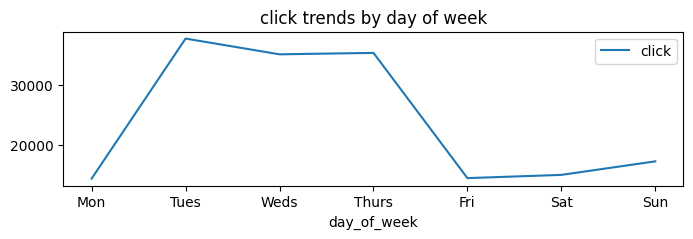

In [17]:
train['day_of_week'] = train['hour'].apply(lambda val: val.day_name())
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
train.groupby('day_of_week').agg({'click': 'sum'}).reindex(cats).plot(figsize = (8, 2))
ticks = list(range(0, 7, 1)) # X axis points where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.title('click trends by day of week')

Text(0.5, 1.0, 'Impressions vs. clicks by day of week')

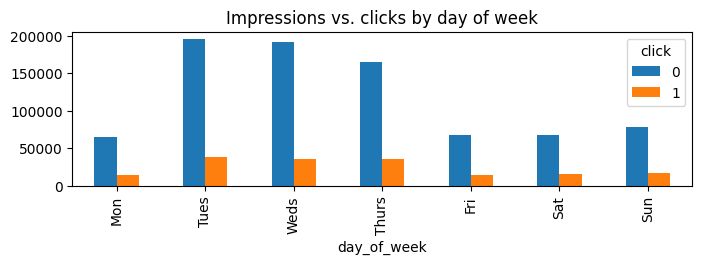

In [18]:
train.groupby(['day_of_week', 'click']).size().unstack().reindex(cats).plot(kind = 'bar', title = "Day of the Week", figsize = (8, 2))
ticks = list(range(0, 7, 1)) # X axis points where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.title('Impressions vs. clicks by day of week')

Text(0.5, 1.0, 'Day of week CTR')

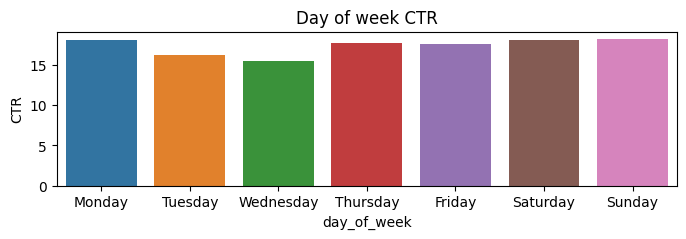

In [19]:
df_click = train[train['click'] == 1]
df_dayofweek = train[['day_of_week', 'click']].groupby(['day_of_week']).count().reset_index()
df_dayofweek = df_dayofweek.rename(columns={'click': 'impressions'})
df_dayofweek['clicks'] = df_click[['day_of_week', 'click']].groupby(['day_of_week']).count().reset_index()['click']
df_dayofweek['CTR'] = df_dayofweek['clicks'] / df_dayofweek['impressions'] * 100
plt.figure(figsize = (8,2))
sns.barplot(y = 'CTR', x = 'day_of_week', data = df_dayofweek, order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Day of week CTR')

In [20]:
train.C1.value_counts() / len(train)

1005    0.918268
1002    0.055122
1010    0.022613
1012    0.002765
1007    0.000867
1001    0.000219
1008    0.000146
Name: C1, dtype: float64

In [21]:
C1_values = train.C1.unique()
C1_values.sort()
ctr_avg_list = []
for i in C1_values:
    ctr_avg = train.loc[np.where((train.C1 == i))].click.mean()
    ctr_avg_list.append(ctr_avg)
    print("for C1 value: {},  click through rate: {}".format(i, ctr_avg))

for C1 value: 1001,  click through rate: 0.0273972602739726
for C1 value: 1002,  click through rate: 0.2101157432604042
for C1 value: 1005,  click through rate: 0.1690062160502163
for C1 value: 1007,  click through rate: 0.04267589388696655
for C1 value: 1008,  click through rate: 0.1095890410958904
for C1 value: 1010,  click through rate: 0.09083270685004201
for C1 value: 1012,  click through rate: 0.17576853526220615


<AxesSubplot:title={'center':'C1 histogram'}, xlabel='C1'>

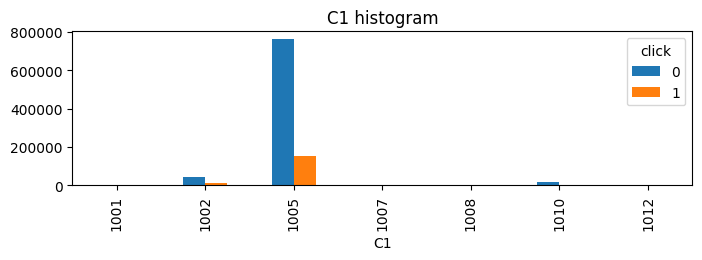

In [22]:
train.groupby(['C1', 'click']).size().unstack().plot(kind = 'bar', figsize = (8, 2), title = 'C1 histogram')

Text(0.5, 1.0, 'CTR by C1')

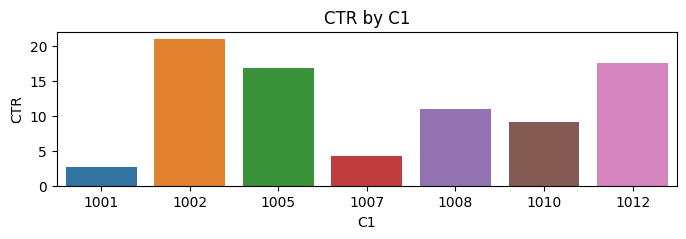

In [23]:
df_c1 = train[['C1', 'click']].groupby(['C1']).count().reset_index()
df_c1 = df_c1.rename(columns = {'click': 'impressions'})
df_c1['clicks'] = df_click[['C1', 'click']].groupby(['C1']).count().reset_index()['click']
df_c1['CTR'] = df_c1['clicks'] / df_c1['impressions'] * 100
plt.figure(figsize=(8, 2))
sns.barplot(y = 'CTR', x = 'C1', data = df_c1)
plt.title('CTR by C1')

In [24]:
# train['click'].mean()
df_c1.CTR.describe()

count     7.000000
mean     11.791220
std       6.966046
min       2.739726
25%       6.675430
50%      10.958904
75%      17.238738
max      21.011574
Name: CTR, dtype: float64

In [25]:
train.banner_pos.value_counts() / len(train)

0    0.719906
1    0.278325
7    0.001098
2    0.000301
4    0.000179
5    0.000146
3    0.000045
Name: banner_pos, dtype: float64

In [26]:
banner_pos = train.banner_pos.unique()
banner_pos.sort()
ctr_avg_list = []
for i in banner_pos:
    ctr_avg = train.loc[np.where((train.banner_pos == i))].click.mean()
    ctr_avg_list.append(ctr_avg)
    print("for banner position: {},  click through rate: {}".format(i, ctr_avg))

for banner position: 0,  click through rate: 0.16359774748369926
for banner position: 1,  click through rate: 0.1839360459894009
for banner position: 2,  click through rate: 0.10631229235880399
for banner position: 3,  click through rate: 0.15555555555555556
for banner position: 4,  click through rate: 0.17318435754189945
for banner position: 5,  click through rate: 0.1095890410958904
for banner position: 7,  click through rate: 0.290528233151184


<AxesSubplot:title={'center':'banner position histogram'}, xlabel='banner_pos'>

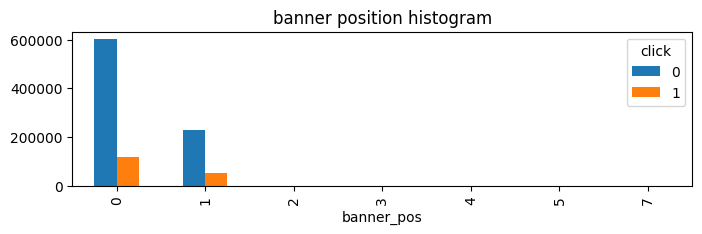

In [27]:
train.groupby(['banner_pos', 'click']).size().unstack().plot(kind = 'bar', figsize = (8, 2), title = 'banner position histogram')

Text(0.5, 1.0, 'CTR by banner position')

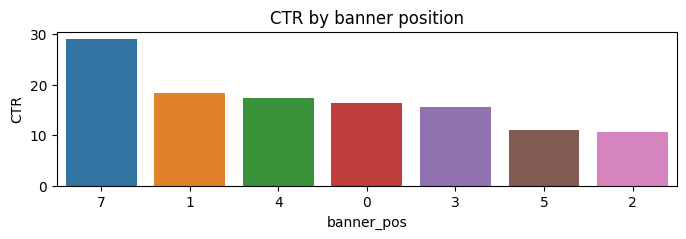

In [28]:
df_banner = train[['banner_pos', 'click']].groupby(['banner_pos']).count().reset_index()
df_banner = df_banner.rename(columns = {'click': 'impressions'})
df_banner['clicks'] = df_click[['banner_pos', 'click']].groupby(['banner_pos']).count().reset_index()['click']
df_banner['CTR'] = df_banner['clicks'] / df_banner['impressions'] * 100
sort_banners = df_banner.sort_values(by = 'CTR', ascending = False)['banner_pos'].tolist()
plt.figure(figsize = (8, 2))
sns.barplot(y = 'CTR', x = 'banner_pos', data = df_banner, order = sort_banners)
plt.title('CTR by banner position')

In [29]:
df_banner.CTR.describe()

count     7.000000
mean     16.895761
std       6.148041
min      10.631229
25%      13.257230
50%      16.359775
75%      17.856020
max      29.052823
Name: CTR, dtype: float64

In [30]:
train.site_id.nunique()

2648

In [31]:
print('The top 10 sites ids that have the most impressions\n\n', (train.site_id.value_counts() / len(train))[0:10])

The top 10 sites ids that have the most impressions

 85f751fd    0.362006
1fbe01fe    0.160300
e151e245    0.065145
d9750ee7    0.023693
5b08c53b    0.022230
5b4d2eda    0.019132
856e6d3f    0.019124
a7853007    0.011476
b7e9786d    0.009153
5ee41ff2    0.008668
Name: site_id, dtype: float64


In [32]:
top10_ids = (train.site_id.value_counts() / len(train))[0:10].index
click_avg_list = []
for i in top10_ids:
    click_avg = train.loc[np.where((train.site_id == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for site id value: {},  click through rate: {}".format(i, click_avg))

for site id value: 85f751fd,  click through rate: 0.11765550847223527
for site id value: 1fbe01fe,  click through rate: 0.20782907049282595
for site id value: e151e245,  click through rate: 0.2977972215826234
for site id value: d9750ee7,  click through rate: 0.2818976068881104
for site id value: 5b08c53b,  click through rate: 0.45321637426900585
for site id value: 5b4d2eda,  click through rate: 0.13187330127535019
for site id value: 856e6d3f,  click through rate: 0.04298263961514327
for site id value: a7853007,  click through rate: 0.10108051585918439
for site id value: b7e9786d,  click through rate: 0.0787719873265596
for site id value: 5ee41ff2,  click through rate: 0.33260267651130593


<AxesSubplot:title={'center':'Top 10 sites ids histogram'}, xlabel='site_id'>

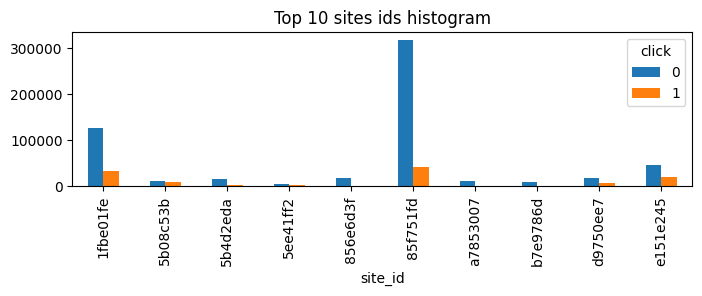

In [33]:
top10_sites = train[(train.site_id.isin((train.site_id.value_counts() / len(train))[0:10].index))]
top10_sites_click = top10_sites[top10_sites['click'] == 1]
top10_sites.groupby(['site_id', 'click']).size().unstack().plot(kind = 'bar', figsize = (8, 2), title = 'Top 10 sites ids histogram')

Text(0.5, 1.0, 'CTR by top 10 site id')

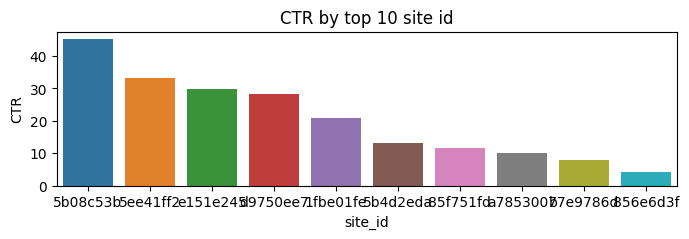

In [34]:
df_site = top10_sites[['site_id', 'click']].groupby(['site_id']).count().reset_index()
df_site = df_site.rename(columns = {'click': 'impressions'})
df_site['clicks'] = top10_sites_click[['site_id', 'click']].groupby(['site_id']).count().reset_index()['click']
df_site['CTR'] = df_site['clicks'] / df_site['impressions'] * 100
sort_site = df_site.sort_values(by = 'CTR', ascending = False)['site_id'].tolist()
plt.figure(figsize = (8, 2))
sns.barplot(y = 'CTR', x = 'site_id', data = df_site, order = sort_site)
plt.title('CTR by top 10 site id')

In [35]:
train.site_domain.nunique()

2883

In [36]:
print('The top 10 sites domains that have the most impressions\n\n', (train.site_domain.value_counts() / len(train))[0:10])

The top 10 sites domains that have the most impressions

 c4e18dd6    0.375354
f3845767    0.160300
7e091613    0.082134
7687a86e    0.031627
98572c79    0.024529
16a36ef3    0.021248
58a89a43    0.019124
9d54950b    0.009488
b12b9f85    0.009299
17d996e6    0.008796
Name: site_domain, dtype: float64


In [37]:
top10_domains = (train.site_domain.value_counts() / len(train))[0:10].index
click_avg_list = []
for i in top10_domains:
    click_avg = train.loc[np.where((train.site_domain == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for site domain value: {},  click through rate: {}".format(i, click_avg))

for site domain value: c4e18dd6,  click through rate: 0.12154126504579676
for site domain value: f3845767,  click through rate: 0.20782907049282595
for site domain value: 7e091613,  click through rate: 0.2597584435191273
for site domain value: 7687a86e,  click through rate: 0.44926803048028585
for site domain value: 98572c79,  click through rate: 0.2756329242936932
for site domain value: 16a36ef3,  click through rate: 0.1447195030120482
for site domain value: 58a89a43,  click through rate: 0.04298263961514327
for site domain value: 9d54950b,  click through rate: 0.11287942664418213
for site domain value: b12b9f85,  click through rate: 0.0794709108506291
for site domain value: 17d996e6,  click through rate: 0.33003638017280584


<AxesSubplot:title={'center':'Top 10 site domains histogram'}, xlabel='site_domain'>

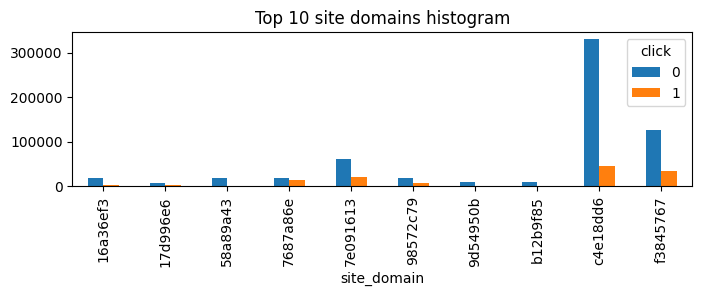

In [38]:
top10_domain = train[(train.site_domain.isin((train.site_domain.value_counts() / len(train))[0:10].index))]
top10_domain_click = top10_domain[top10_domain['click'] == 1]
top10_domain.groupby(['site_domain', 'click']).size().unstack().plot(kind = 'bar', figsize = (8, 2), title = 'Top 10 site domains histogram')

Text(0.5, 1.0, 'CTR by top 10 site domain')

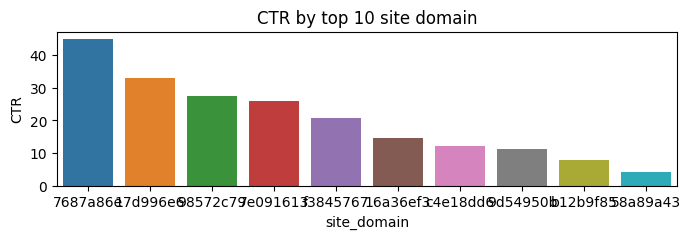

In [39]:
df_domain = top10_domain[['site_domain', 'click']].groupby(['site_domain']).count().reset_index()
df_domain = df_domain.rename(columns={'click': 'impressions'})
df_domain['clicks'] = top10_domain_click[['site_domain', 'click']].groupby(['site_domain']).count().reset_index()['click']
df_domain['CTR'] = df_domain['clicks'] / df_domain['impressions'] * 100
sort_domain = df_domain.sort_values(by = 'CTR', ascending = False)['site_domain'].tolist()
plt.figure(figsize=(8, 2))
sns.barplot(y = 'CTR', x = 'site_domain', data = df_domain, order = sort_domain)
plt.title('CTR by top 10 site domain')

In [40]:
train.site_category.nunique()

23

In [41]:
print('The top 10 sites categories that have the most impressions\n\n', (train.site_category.value_counts() / len(train))[0:10])

The top 10 sites categories that have the most impressions

 50e219e0    0.410192
f028772b    0.312645
28905ebd    0.182245
3e814130    0.075063
f66779e6    0.006166
75fa27f6    0.003930
335d28a8    0.003426
76b2941d    0.002578
c0dd3be3    0.001074
72722551    0.000696
Name: site_category, dtype: float64


In [42]:
top10_categories = (train.site_category.value_counts() / len(train))[0:10].index
click_avg_list = []
for i in top10_categories:
    click_avg=train.loc[np.where((train.site_category == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for site category value: {},  click through rate: {}".format(i, click_avg))

for site category value: 50e219e0,  click through rate: 0.12750370558177634
for site category value: f028772b,  click through rate: 0.17992931279886132
for site category value: 28905ebd,  click through rate: 0.20994814672556175
for site category value: 3e814130,  click through rate: 0.2785127159852391
for site category value: f66779e6,  click through rate: 0.03940966590982809
for site category value: 75fa27f6,  click through rate: 0.10636132315521629
for site category value: 335d28a8,  click through rate: 0.09398715703444249
for site category value: 76b2941d,  click through rate: 0.03452288595810706
for site category value: c0dd3be3,  click through rate: 0.1005586592178771
for site category value: 72722551,  click through rate: 0.05747126436781609


<AxesSubplot:title={'center':'Top 10 site categories histogram'}, xlabel='site_category'>

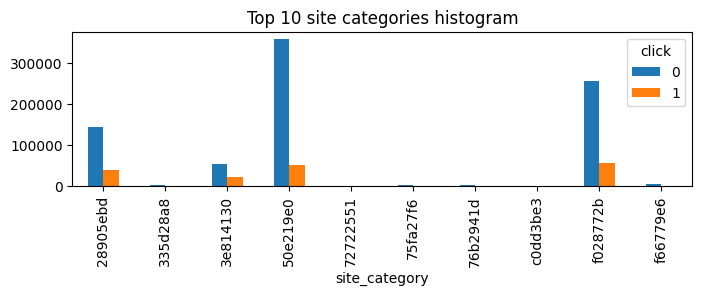

In [43]:
top10_category = train[(train.site_category.isin((train.site_category.value_counts() / len(train))[0:10].index))]
top10_category_click = top10_category[top10_category['click'] == 1]
top10_category.groupby(['site_category', 'click']).size().unstack().plot(kind = 'bar', figsize = (8, 2), title = 'Top 10 site categories histogram')

Text(0.5, 1.0, 'CTR by top 10 site category')

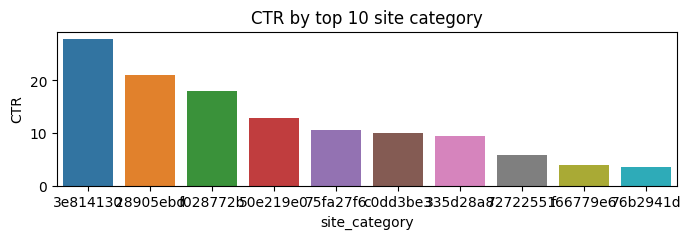

In [44]:
df_category = top10_category[['site_category', 'click']].groupby(['site_category']).count().reset_index()
df_category = df_category.rename(columns = {'click': 'impressions'})
df_category['clicks'] = top10_category_click[['site_category', 'click']].groupby(['site_category']).count().reset_index()['click']
df_category['CTR'] = df_category['clicks'] / df_category['impressions'] * 100
sort_category = df_category.sort_values(by = 'CTR', ascending = False)['site_category'].tolist()
plt.figure(figsize=(8, 2))
sns.barplot(y = 'CTR', x = 'site_category', data = df_category, order = sort_category)
plt.title('CTR by top 10 site category')

In [45]:
train.device_id.nunique()

151252

In [46]:
print('The top 10 devices that have the most impressions\n\n', (train.device_id.value_counts() / len(train))[0:10])

The top 10 devices that have the most impressions

 a99f214a    0.824264
0f7c61dc    0.000515
c357dbff    0.000467
936e92fb    0.000349
afeffc18    0.000230
d857ffbb    0.000108
987552d1    0.000102
28dc8687    0.000098
cef4c8cc    0.000098
b09da1c4    0.000086
Name: device_id, dtype: float64


In [47]:
top10_devices = (train.device_id.value_counts() / len(train))[0:10].index
click_avg_list = []
for i in top10_devices:
    click_avg=train.loc[np.where((train.device_id == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for device id value: {},  click through rate: {}".format(i, click_avg))

for device id value: a99f214a,  click through rate: 0.17415779410480137
for device id value: 0f7c61dc,  click through rate: 0.7592233009708738
for device id value: c357dbff,  click through rate: 0.6188436830835118
for device id value: 936e92fb,  click through rate: 0.04871060171919771
for device id value: afeffc18,  click through rate: 0.20434782608695654
for device id value: d857ffbb,  click through rate: 0.18518518518518517
for device id value: 987552d1,  click through rate: 0.0
for device id value: 28dc8687,  click through rate: 0.0
for device id value: cef4c8cc,  click through rate: 0.3163265306122449
for device id value: b09da1c4,  click through rate: 0.12790697674418605


<AxesSubplot:title={'center':'Top 10 device ids histogram'}, xlabel='device_id'>

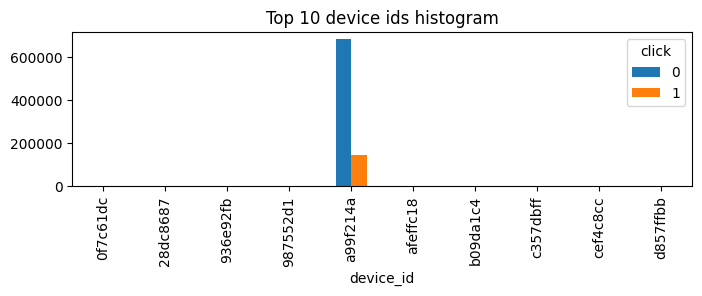

In [48]:
top10_device = train[(train.device_id.isin((train.device_id.value_counts() / len(train))[0:10].index))]
top10_device_click = top10_device[top10_device['click'] == 1]
top10_device.groupby(['device_id', 'click']).size().unstack().plot(kind = 'bar', figsize = (8, 2), title = 'Top 10 device ids histogram')

In [50]:
print("There are {} devices ips in the data set".format(train.device_ip.nunique()))
print("There are {} devices types in the data set".format(train.device_type.nunique()))
print("There are {} devices models in the data set".format(train.device_model.nunique()))
print("There are {} devices cnn types in the data set".format(train.device_conn_type.nunique()))

There are 555679 devices ips in the data set
There are 5 devices types in the data set
There are 5193 devices models in the data set
There are 4 devices cnn types in the data set


In [51]:
print('The impressions by devices types\n\n', (train.device_type.value_counts() / len(train)))

The impressions by devices types

 1    0.922263
0    0.055122
4    0.019415
5    0.003198
2    0.000002
Name: device_type, dtype: float64


<AxesSubplot:title={'center':'device types'}, xlabel='device_type'>

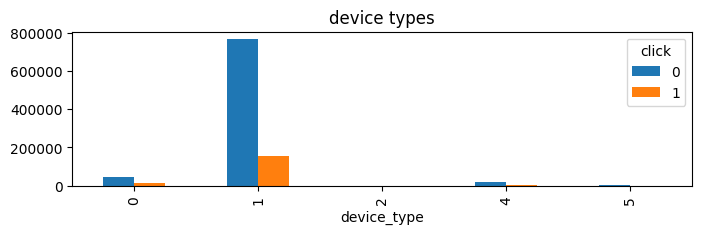

In [52]:
train[['device_type', 'click']].groupby(['device_type', 'click']).size().unstack().plot(kind = 'bar', figsize = (8, 2), title = 'device types')

<AxesSubplot:title={'center':'Clicks from device type 1 by hour of day'}, xlabel='hour_of_day'>

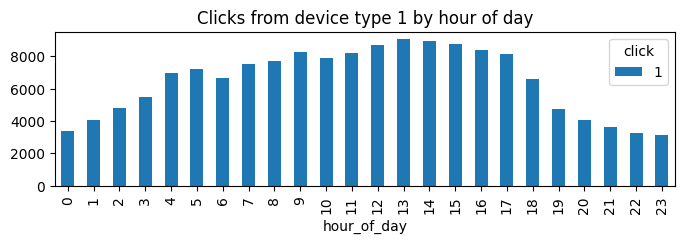

In [53]:
df_click[df_click['device_type'] == 1].groupby(['hour_of_day', 'click']).size().unstack().plot(kind = 'bar', title = "Clicks from device type 1 by hour of day", figsize = (8, 2))

In [54]:
device_type_click = df_click.groupby('device_type').agg({'click': 'sum'}).reset_index()
device_type_impression = train.groupby('device_type').agg({'click': 'count'}).reset_index().rename(columns = {'click': 'impressions'})
merged_device_type = pd.merge(left = device_type_click , right = device_type_impression, how = 'inner', on = 'device_type')

In [55]:
merged_device_type['CTR'] = merged_device_type['click'] / merged_device_type['impressions'] * 100

In [56]:
merged_device_type

,device_type,click,impressions,CTR
0,0,11582,55122,21.011574
1,1,155738,922263,16.886506
2,4,1747,19415,8.998197
3,5,307,3198,9.599750


In [57]:
print("There are {} apps in the data set".format(train.app_id.nunique()))
print("There are {} apps domains in the data set".format(train.app_domain.nunique()))
print("There are {} apps categories in the data set".format(train.app_category.nunique()))

There are 3187 apps in the data set
There are 202 apps domains in the data set
There are 25 apps categories in the data set


In [58]:
print('The impressions by apps categories\n\n', (train.app_category.value_counts() / len(train)))

The impressions by apps categories

 07d7df22    0.646242
0f2161f8    0.237563
cef3e649    0.042841
8ded1f7a    0.036266
f95efa07    0.028153
d1327cf5    0.003010
09481d60    0.001374
dc97ec06    0.001302
75d80bbe    0.000995
fc6fa53d    0.000586
4ce2e9fc    0.000521
879c24eb    0.000342
a3c42688    0.000289
0f9a328c    0.000149
4681bb9d    0.000143
2281a340    0.000069
a86a3e89    0.000057
8df2e842    0.000042
79f0b860    0.000013
0bfbc358    0.000011
7113d72a    0.000009
a7fd01ec    0.000009
18b1e0be    0.000007
2fc4f2aa    0.000006
5326cf99    0.000001
Name: app_category, dtype: float64


<AxesSubplot:title={'center':'App Category v/s Clicks'}>

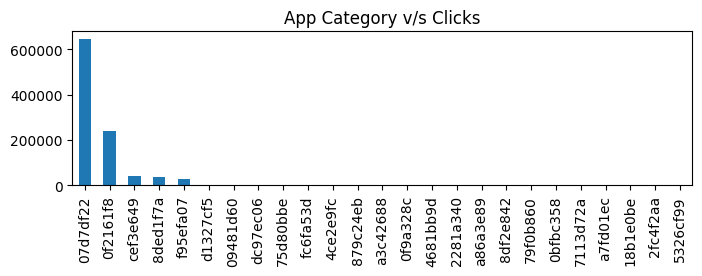

In [59]:
train['app_category'].value_counts().plot(kind = 'bar', figsize=(8, 2),title = 'App Category v/s Clicks')

<AxesSubplot:title={'center':'Intra-category CTR'}, xlabel='app_category'>

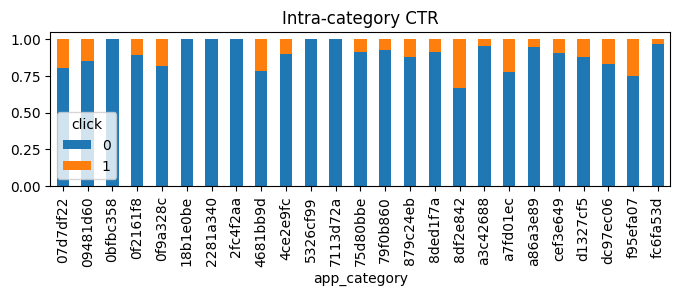

In [60]:
train_app_category = train.groupby(['app_category', 'click']).size().unstack()
train_app_category.div(train_app_category.sum(axis = 1), axis = 0).plot(kind = 'bar', figsize=(8, 2), stacked = True, title = "Intra-category CTR")

In [61]:
print("There are {} C14 in the data set".format(train.C14.nunique()))
print("There are {} C15 in the data set".format(train.C15.nunique()))
print("There are {} C16 in the data set".format(train.C16.nunique()))
print("There are {} C17 in the data set".format(train.C17.nunique()))
print("There are {} C18 in the data set".format(train.C18.nunique()))
print("There are {} C19 in the data set".format(train.C19.nunique()))
print("There are {} C20 in the data set".format(train.C20.nunique()))

There are 2246 C14 in the data set
There are 8 C15 in the data set
There are 9 C16 in the data set
There are 423 C17 in the data set
There are 4 C18 in the data set
There are 66 C19 in the data set
There are 164 C20 in the data set


<AxesSubplot:title={'center':'C15 distribution'}, xlabel='C15'>

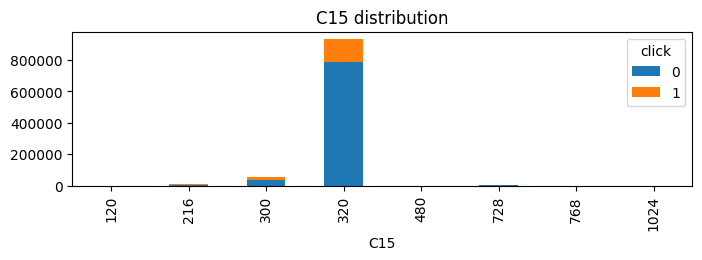

In [62]:
train.groupby(['C15', 'click']).size().unstack().plot(kind = 'bar', stacked = True, title = 'C15 distribution', figsize=(8, 2))

<AxesSubplot:title={'center':'C16 distribution'}, xlabel='C16'>

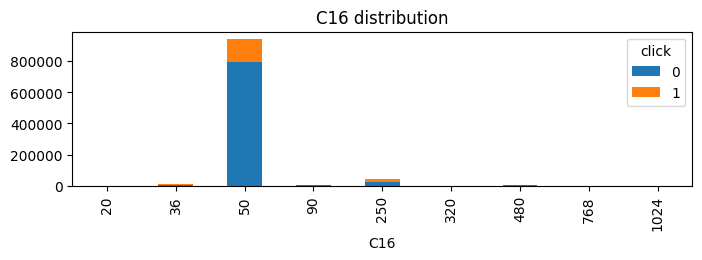

In [63]:
train.groupby(['C16', 'click']).size().unstack().plot(kind = 'bar', stacked = True, title = 'C16 distribution', figsize=(8, 2))

<AxesSubplot:title={'center':'C18 distribution'}, xlabel='C18'>

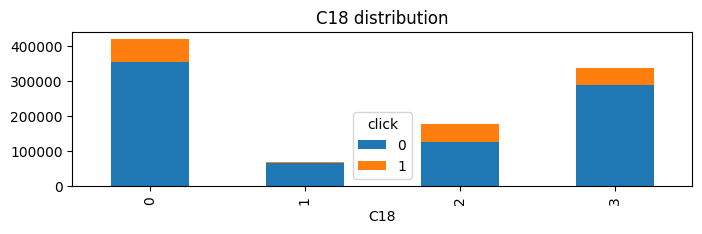

In [64]:
train.groupby(['C18', 'click']).size().unstack().plot(kind = 'bar', stacked = True, title = 'C18 distribution', figsize=(8, 2))

In [65]:
def convert_obj_to_int(self):
    object_list_columns = self.columns
    object_list_dtypes = self.dtypes
    new_col_suffix = '_int'
    for index in range(0, len(object_list_columns)):
        if object_list_dtypes[index] == object :
            self[object_list_columns[index] + new_col_suffix] = self[object_list_columns[index]].map( lambda  x: hash(x))
            self.drop([object_list_columns[index]], inplace = True, axis = 1)
    return self

In [66]:
train = convert_obj_to_int(train)
train.head(3)

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,...,site_id_int,site_domain_int,site_category_int,app_id_int,app_domain_int,app_category_int,device_id_int,device_ip_int,device_model_int,day_of_week_int
0,-1636923355,0,2014-10-21,1005,0,1,0,15708,320,50,...,6373043700188291620,-5511379032949714935,-8805993859622671685,362875005268775092,8176632709276707417,6882314825444301302,3069047691060701843,7685157809018790860,3532137426143596990,-57214797326767421
1,1315039248,0,2014-10-21,1005,0,1,0,15705,320,50,...,-486863808440466488,4651394063986623665,-1364587770277474253,6405161663440559749,-8680870569030968151,7976027688165018410,4222224701040335988,-3515275945888095523,-9070302001846721108,-57214797326767421
2,-193497663,0,2014-10-21,1005,1,1,0,17747,320,50,...,4484246759142601234,-3375763553190350670,-8127572510785297981,6405161663440559749,-8680870569030968151,7976027688165018410,4222224701040335988,-5864194541130729468,1826355283659301160,-57214797326767421


In [67]:
train.drop('hour', axis = 1, inplace = True)
train.drop('id', axis = 1, inplace = True)

In [69]:
type(train)

pandas.core.frame.DataFrame

In [70]:
train.to_csv("click_train.csv")